# Лабораторная работа №7

## Задание:

Написать реализацию Rejection sampling и метод Metropolis-Hastings

Применить для 1-2 функций плотности и поспроить график сэмплирования точки и линий уровня (можно пользоваться нормальными или равномерными генераторами)

In [1]:
import math
import copy
import numpy as np
import random
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
from PIL import Image

### Распределение Коши $$F(x) = \frac{1}{\pi} \left(\frac{\gamma}{\gamma^2 + (x-x_0)^2}\right)$$

### или $$\frac{1}{\pi}\cdot\left(\frac{1}{1^2+\left(x-3\right)^2}\right)$$

In [2]:
def Cauchy(x):
    m=1
    d=3
    return 8*1/math.pi*(d/(d**2+(x-m)**2))

### Распределение Лапласа $$F(x) = \frac{a}{2}e^{-a\left|x-b\right|}$$

### или $$\frac{0.7}{2}e^{-0.7\left|x-3\right|}$$

In [3]:
def Laplace(x):
    m=0.7
    d=3
    return (m/2)*math.e**(-m*abs(x-d))

### Нормальное распределение $$8\cdot\frac{1}{6\cdot2\pi^{\frac{1}{2}}}\cdot e^{-\frac{\left(x-3\right)^2}{2\cdot6^2}}$$

### Rejection Sampling

In [4]:
def Rej_samp(n,f,a,b,c):
    in_x=[]
    in_y=[]
    out_x=[]
    out_y=[]
    while len(in_x) < n:
        x = np.random.rand() * (b-a) + a
        y = np.random.rand() * c
        if y < f(x):
            in_x.append(x)
            in_y.append(y)
        else:
            out_x.append(x)
            out_y.append(y)
    return in_x, in_y, out_x, out_y

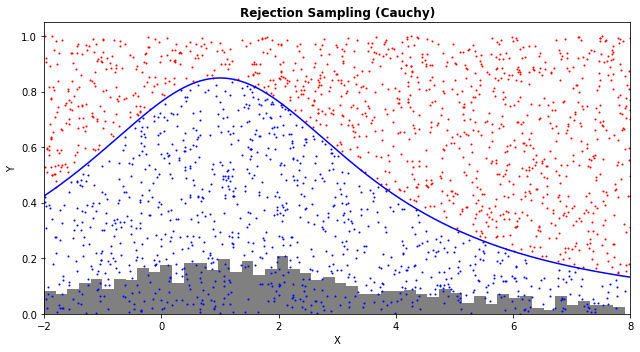

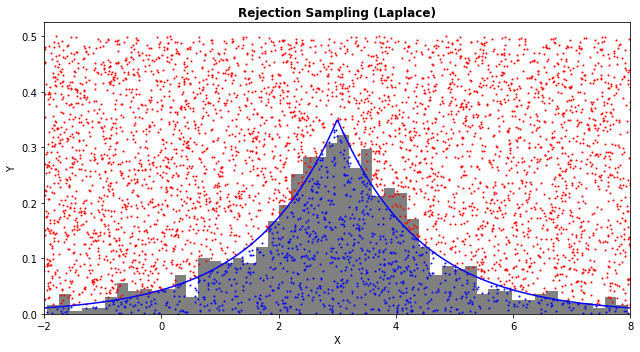

In [5]:
grid_points = 1000
min, max = -2, 8
x = np.linspace(min, max, grid_points)
y = Cauchy(x)

in_x, in_y, out_x, out_y = Rej_samp(1000,Cauchy, min, max, 1)

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(in_x, 50, density=True, color="grey") # Плотность точек на координату
ax.plot(x, y, color="blue") # График функции
ax.scatter(in_x, in_y, s=1,color = "blue")
ax.scatter(out_x, out_y, s=1, color = "red")

ax.set_xlim((min, max))
ax.set_title('Rejection Sampling (Cauchy)', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

plt.show()

#Второй график
x = np.linspace(min, max, grid_points)
y = Laplace(x)

in_x, in_y, out_x, out_y = Rej_samp(1000,Laplace, min, max, 0.5)

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(in_x, 50, density=True, color="grey") # Плотность точек на координату
ax.plot(x, y, color="blue") # График функции
ax.scatter(in_x, in_y, s=1,color = "blue") 
ax.scatter(out_x, out_y, s=1, color = "red")

ax.set_xlim((min, max))
ax.set_title('Rejection Sampling (Laplace)', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

plt.show()

### Metropolis-Hastings

In [6]:
def Metr_Hast(n,f,x0):
    x=[x0]
    while len(x) < n:
        x_prev = x[-1]
        x_next = np.random.normal(x_prev)
        ratio = f(x_next)/f(x_prev)
        if np.random.rand() < ratio:
            x.append(x_next)
        else:
            x.append(x_prev)
    return x

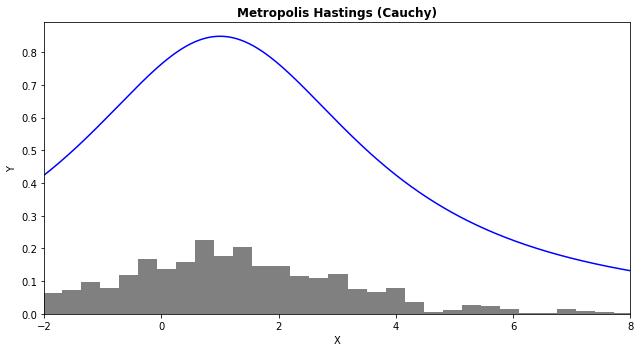

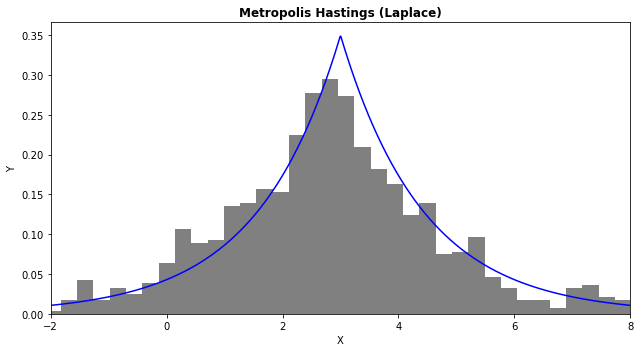

In [7]:
x = np.linspace(min, max, grid_points)
y = Cauchy(x)

MH_x = Metr_Hast(1000, Cauchy, 1)

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(MH_x, 50, density=True, color="grey") # Плотность точек на координату
ax.plot(x, y, color="blue") # График функции

ax.set_xlim((min, max))
ax.set_title('Metropolis Hastings (Cauchy)', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

plt.show()

#Второй график
x = np.linspace(min, max, grid_points)
y = Laplace(x)

MH_x = Metr_Hast(1000, Laplace, 1)

points = np.zeros((1000))

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(MH_x, 50, density=True, color="grey") # Плотность точек на координату
ax.plot(x, y, color="blue") # График функции

ax.set_xlim((min, max))
ax.set_title('Metropolis Hastings (Laplace)', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

plt.show()